In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import neighbors

In [0]:
df = pd.read_csv('Smarket.csv')
del df['Unnamed: 0']
len(df.columns)

9

In [0]:
df.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [0]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [0]:
df.shape[0]

1250

In [0]:
df
df.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

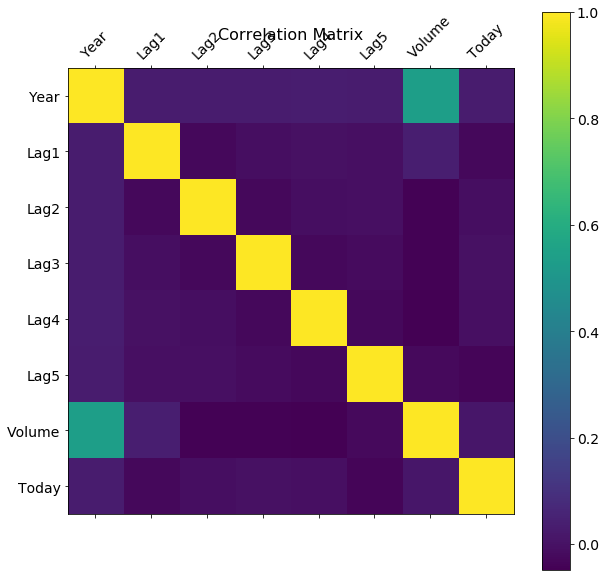

In [0]:
f = plt.figure(figsize=(10,10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]-1), df.drop('Direction', axis=1).columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]-1), df.drop('Direction', axis=1).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

The correlation matrix shows the correlation between different values. A value of 1 is perfect correlation, a value of 0 indicates no correlation and a value of -1 indicates a perfect negative correlation. From this correlation matrix we can see that the correlation between the lag variables is close to 0, which indicates no correlation.  The only significant correlation in the matrix is between year and volume. 

Text(0.5, 0, 'Year')

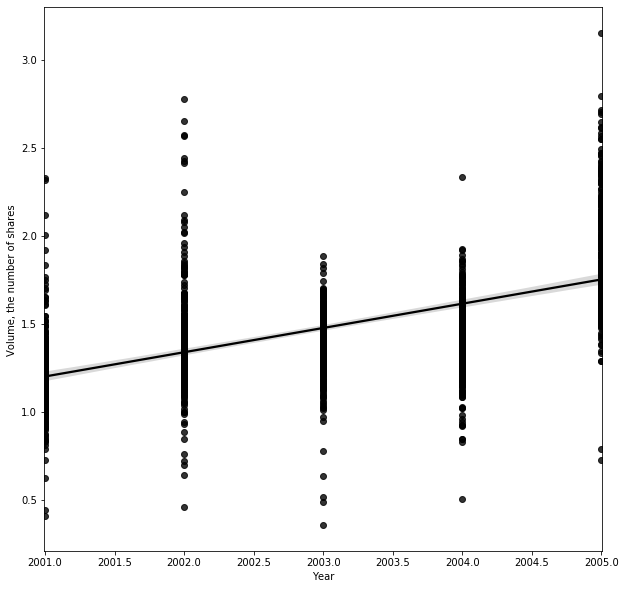

In [0]:
plt.figure(figsize=(10,10))
sns.regplot(x="Year", y="Volume", color="black", data=df);
plt.ylabel("Volume, the number of shares ")
plt.xlabel("Year")

By examining the plotted data we can see that the Volume, or the number of shares increases each as the number of years increases which confirms the positive correlation shown by the correlation matrix. 

In [0]:
model = smf.glm(formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 04 Mar 2020   Deviance:                       1727.6
Time:                                          01:48:53   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

The table shows the results of the logistic regression, from the p values we can see that all of the values do not have a clear correlation with Direction. Lag1 and Lag2 have a positive coeficient suggesting that the higher these values are the more likely the market will go up and Lag3,Lag4,Lag5 and Volume have a negative coeficient suggesting that the higher these values are the less likely the market will go up. 

In [0]:
probs = result.predict()
pred = np.array(probs > 0.5, dtype=float)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in pred]
print(confusion_matrix(df["Direction"], predictions_nominal))

[[145 457]
 [141 507]]


In [0]:
print(classification_report(df["Direction"], predictions_nominal, digits=3))

              precision    recall  f1-score   support

        Down      0.507     0.241     0.327       602
          Up      0.526     0.782     0.629       648

    accuracy                          0.522      1250
   macro avg      0.516     0.512     0.478      1250
weighted avg      0.517     0.522     0.483      1250



By examining the confusion matrix we can see that the Direction and predicted were Up 507 days and the Direction and predicted were down 145 days. 141 days the direction was Up but the prediction was down and 457 days the direction was down but the prediction was up. This gives us an accuracy of 0.52 or 52%

In [0]:
model = smf.glm(formula = 'Direction ~ Lag1 + Lag2', data=df, family=sm.families.Binomial())
result = model.fit()
probs = result.predict()
pred = np.array(probs > 0.5, dtype=float)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in pred]
print(confusion_matrix(df["Direction"], predictions_nominal))
print(classification_report(df["Direction"], predictions_nominal, digits=3))

[[114 488]
 [102 546]]
              precision    recall  f1-score   support

        Down      0.528     0.189     0.279       602
          Up      0.528     0.843     0.649       648

    accuracy                          0.528      1250
   macro avg      0.528     0.516     0.464      1250
weighted avg      0.528     0.528     0.471      1250



We adjusted the model and included only Lag1 and Lag2, from the confusion matrix we can see that the Direction and predicted were Up 546 days and Direction and predicted were down 114 days. 488 days the prediction was up but direction was down and 102 days the direction was up but the prediction was down. This gives us an accuracy of 0.53 or 53%

In [0]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(df[['Lag1','Lag2']], df['Direction'])
print(model.priors_)
print(model.means_)
print(model.coef_)

[0.4816 0.5184]
[[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]
[[-0.07126095 -0.04433204]]


The prior probabilities of groups give us the percentage values of the training observations found in each category in this case 0.48 or 48% of observations correspond to Down direction and 0.518 or 51.8% of observations corresponds to Up direction. The group means show the average of the two predictors within the two categories. The average for Lag1 in the Down category is 0.0506 and the average for Lag2 in the Down category is 0.322. This suggests that the percentage return for previous day and for 2 days previous is positive when the market goes down. The average for Lag1 in the Up category is -0.0396 and the average for Lag2 in the Up category is -0.224. This suggests that the percentage return for the previous day and for 2 days previous is negative when the market goes up. 

The coefficients of linear discriminants are used to calculate the score which is used to calculate the posterior probability of class memebership.

In [0]:
pred=model.predict(df[['Lag1','Lag2']])
print(confusion_matrix(pred, df['Direction']))
print(classification_report(df['Direction'], pred, digits=3))

[[114 102]
 [488 546]]
              precision    recall  f1-score   support

        Down      0.528     0.189     0.279       602
          Up      0.528     0.843     0.649       648

    accuracy                          0.528      1250
   macro avg      0.528     0.516     0.464      1250
weighted avg      0.528     0.528     0.471      1250



By examining the confusion matrix we can see that the Direction and predicted were Up 546 days and the Direction and predicted were down 114 days. 102 days the direction was Up but the prediction was down and 488 days the direction was down but the prediction was up. This gives us an accuracy of 0.53 or 53%

In [0]:
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(df[['Lag1','Lag2']], df['Direction'])
print(model.priors_)
print(model.means_)

[0.4816 0.5184]
[[ 0.05068605  0.03229734]
 [-0.03969136 -0.02244444]]


These values are the same as for the LDA with the notable absance of coefficients of linear discriminants as QDA uses a quadratic function for the predictors instead of a linear one. 

In [0]:
pred=model.predict(df[['Lag1','Lag2']])
print(confusion_matrix(pred, df['Direction']))
print(classification_report(df['Direction'], pred, digits=3))

[[109  94]
 [493 554]]
              precision    recall  f1-score   support

        Down      0.537     0.181     0.271       602
          Up      0.529     0.855     0.654       648

    accuracy                          0.530      1250
   macro avg      0.533     0.518     0.462      1250
weighted avg      0.533     0.530     0.469      1250



By examining the confusion matrix we can see that the Direction and predicted were Up 554 days and the Direction and predicted were down 109 days. 94 days the direction was Up but the prediction was down and 493 days the direction was down but the prediction was up. This gives us an accuracy of 0.53 or 53%

In [0]:
train = df[df['Year'] >= 2005]
print(train.shape[0])

252


In [0]:
X_train = df[df['Year'] < 2005][['Lag1','Lag2']]
y_train = df[df['Year'] < 2005]['Direction']

X_test = df[df['Year'] >= 2005][['Lag1','Lag2']]
y_test = df[df['Year'] >= 2005]['Direction']


knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
pred = knn.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[43 58]
 [68 83]]
              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

    accuracy                          0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



In [0]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
pred = knn.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[48 55]
 [63 86]]
              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

    accuracy                          0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



From looking at the results of K-Nearest Neighbours we can see that the accuracy of our predictions has increased with k. The confusion matrix provides a smaller sample as the data had been split into test and train sets. The train set has values recorded before 2005 and the test set has values recorder from 2005 and onwards.  The accuracy for k=1 is 50% and the accuracy for k=3 is 53.2% which is the highest accuracy of all of the methods that we had tried. 